In [1]:
from cell_env import CellEnv
# Use sb3 env checker:
from stable_baselines3.common.env_checker import check_env



In [2]:
env = CellEnv()
check_env(env)
env.reset()

(array([0.396, 0.396], dtype=float32), {})

In [3]:
env.step(0)

(array([0.396     , 0.49750018], dtype=float32),
 -0.22818171080196503,
 False,
 False,
 {})

In [4]:
env.step(1)

(array([0.49750018, 0.41227043], dtype=float32),
 0.18791637840479058,
 False,
 False,
 {})

In [6]:
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import TimeLimit


# eval wrapper:
env = TimeLimit(env, 20)
# use the monitor wrapper to log the results:
from stable_baselines3.common.monitor import Monitor
env = Monitor(env)
# model = PPO("MlpPolicy", DummyVecEnv([lambda: TimeLimit(env, 10)]), verbose=4)
model = DQN("MlpPolicy", DummyVecEnv([lambda: env]), verbose=4, tensorboard_log="./rl-logs/")
model.learn(total_timesteps=50000, tb_log_name="dqn")


Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | -0.521   |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 573      |
|    time_elapsed     | 0        |
|    total_timesteps  | 80       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | -0.499   |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 502      |
|    time_elapsed     | 0        |
|    total_timesteps  | 160      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00768  |
|    n_updates        | 14       |
----------------------------------
----------------------------------
| rollout/            |          |
|  

In [7]:
# run an episode:
obs = env.reset()
done = False
env = TimeLimit(env, 10)
obs, _ = env.reset()
total_reward = []
observations = []
while not done:
    action, _states = model.predict(obs)
    obs, rewards, term,trunc, info = env.step(action)
    print(obs)
    done=term or trunc
    total_reward.append(rewards)
    observations.append(obs)

[0.217      0.17982443]
[0.17982443 0.1586962 ]
[0.1586962  0.15067933]
[0.15067933 0.15402816]
[0.15402816 0.16795695]
[0.16795695 0.15769178]
[0.15769178 0.16929705]
[0.16929705 0.16116562]
[0.16116562 0.17087896]
[0.17087896 0.16449201]


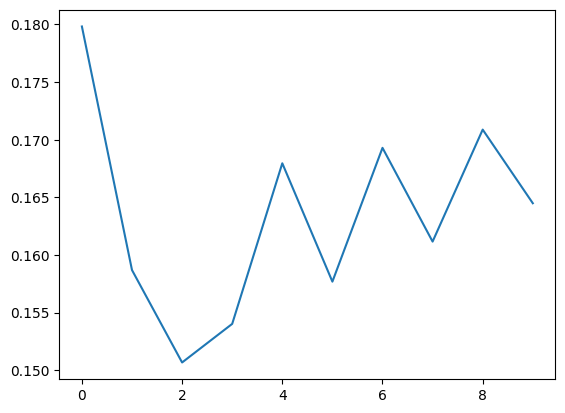

In [15]:
import matplotlib.pyplot as plt
# plt.plot(total_reward)
plt.figure()
plt.plot([ob[1] for ob in observations])

In [14]:
observations

[array([0.217     , 0.17982443], dtype=float32),
 array([0.17982443, 0.1586962 ], dtype=float32),
 array([0.1586962 , 0.15067933], dtype=float32),
 array([0.15067933, 0.15402816], dtype=float32),
 array([0.15402816, 0.16795695], dtype=float32),
 array([0.16795695, 0.15769178], dtype=float32),
 array([0.15769178, 0.16929705], dtype=float32),
 array([0.16929705, 0.16116562], dtype=float32),
 array([0.16116562, 0.17087896], dtype=float32),
 array([0.17087896, 0.16449201], dtype=float32)]

In [18]:
# run an episode:
import numpy as np


obs = env.reset()
done = False
env = TimeLimit(env, 10)
obs, _ = env.reset()
total_reward = []
while not done:
    action = np.random.randint(0, env.action_space.n)
    obs, rewards, term,trunc, info = env.step(action)
    done=term or trunc
    total_reward.append(obs[1])


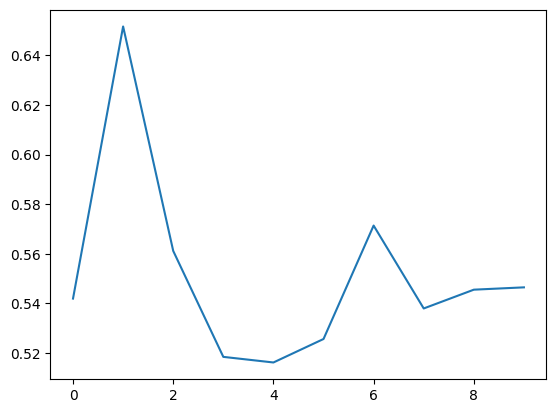

In [19]:
plt.plot(total_reward)